<h2>Fundamental Dataset Exploration</h2><br>

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import random as rand
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Specifying file name 
file = './birthweight_low(1).xlsx'

# Reading the file into Python
birthweight = pd.read_excel(io = file)

# Checking the first 5 rows of the dataset
birthweight.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
# Information about each variable
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [3]:
# Descriptive statistics for numeric data
birthweight.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [4]:
# Using .shape to view (Rows, Columns)
birthweight.shape

(196, 18)

In [5]:
# Formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")



Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [6]:
# Printing column 
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Analyzing the Distribution of Bwght</h2><br>

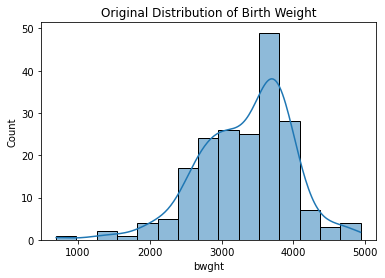

In [7]:
# Developing a histogram using histplot
sns.histplot(data  = birthweight,
         x     = "bwght",
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "bwght") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [8]:
# Creating a list of continuous features (including Bwght)
continuous_data = ['bwght', 'mage', 'fage']

# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Bwght
birthweight_corr.loc[ : , 'bwght' ].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

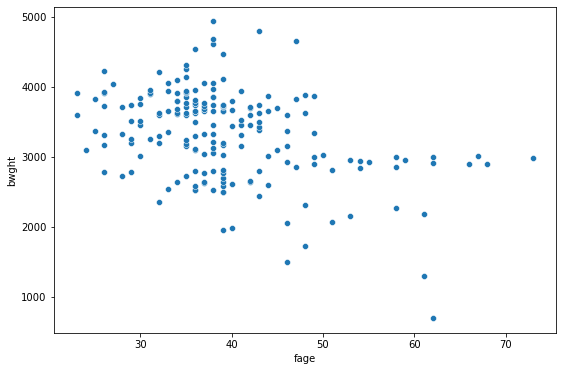

In [9]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = "fage",
                y    = "bwght",
                data = birthweight)


# SHOWing the results
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Building a base model</h2><br>

In [10]:
# Building a base model 

# Instantiating a model type (Fmage)
lm_practice = smf.ols(formula = """bwght ~ fage""",
                                data = birthweight)
                      
results = lm_practice.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     36.08
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           9.20e-09
Time:                        20:57:48   Log-Likelihood:                -1529.4
No. Observations:                 196   AIC:                             3063.
Df Residuals:                     194   BIC:                             3069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4454.2093    191.275     23.287      0.0

In [11]:
# Building a base model 

# Instantiating a model type (Fmage + Mage)
lm_practice = smf.ols(formula = """bwght ~ fage + mage""",
                                data = birthweight)
                      
results = lm_practice.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     30.30
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.61e-12
Time:                        20:57:48   Log-Likelihood:                -1519.3
No. Observations:                 196   AIC:                             3045.
Df Residuals:                     193   BIC:                             3055.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4765.6564    194.554     24.495      0.0

In [12]:
# log transforming Bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# log transforming Father's Age and saving it to the dataset
birthweight['log_fage'] = np.log(birthweight['fage'])


# log transforming Mother's Age and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'] + 0.001)

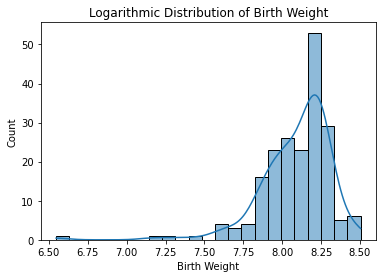

In [13]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [14]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type (log_fage + log_mage)
lm_price_qual = smf.ols(formula = """log_bwght ~ log_fage + log_mage""",
                        data = birthweight)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     28.32
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.64e-11
Time:                        20:57:49   Log-Likelihood:                 33.758
No. Observations:                 196   AIC:                            -61.52
Df Residuals:                     193   BIC:                            -51.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0690      0.269     37.364      0.0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Missing Values Analysis and Imputation</h2><br>

In [15]:
# taking the Birth Weight dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
birthweight.isnull().sum(axis = 0)

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_fage     0
log_mage     0
dtype: int64

In [16]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight[    ['m_meduc', 'm_feduc', 'm_npvis']    ].sum(axis = 0)

m_meduc    3
m_feduc    7
m_npvis    3
dtype: int64

In [17]:
# imputing everything else with the median

# Meduc
fill = 0
birthweight['meduc'] = birthweight['meduc'].fillna(fill)


# Feduc
fill = 0
birthweight['feduc'] = birthweight['feduc'].fillna(fill)


# Npvis
fill = 0
birthweight['npvis'] = birthweight['npvis'].fillna(fill)



In [18]:
# making sure all missing values have been taken care of
birthweight.isnull().any().any()

False

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Developing Trend-Based Features</h2><br>

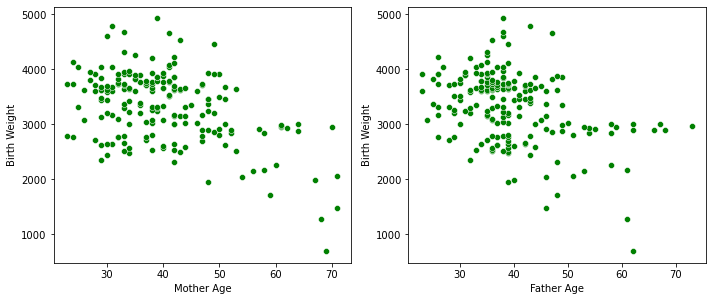

In [19]:
########################
# Visual EDA (Scatterplots)
########################

# Setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# Developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# Adding labels but not adding title
plt.xlabel(xlabel = 'Mother Age')
plt.ylabel(ylabel = 'Birth Weight')

########################


# Developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'g')


# Adding labels but not adding title
plt.xlabel(xlabel = 'Father Age')
plt.ylabel(ylabel = 'Birth Weight')

# cleaning up the layout,and displaying the results
plt.tight_layout()
plt.show()

In [20]:
# counting the number of zeroes
mage_zeroes   = len(birthweight['mage'][birthweight['mage'] == 0])
fage_zeroes     = len(birthweight['fage'][birthweight['fage'] == 0])


# printing a table of the results
print(f"""
            No\t\tYes
            ---------------------
Mother Age  | {mage_zeroes}\t\t{len(birthweight) - mage_zeroes}
Father Age  | {fage_zeroes}\t\t{len(birthweight) - fage_zeroes}
""")


            No		Yes
            ---------------------
Mother Age  | 0		196
Father Age  | 0		196



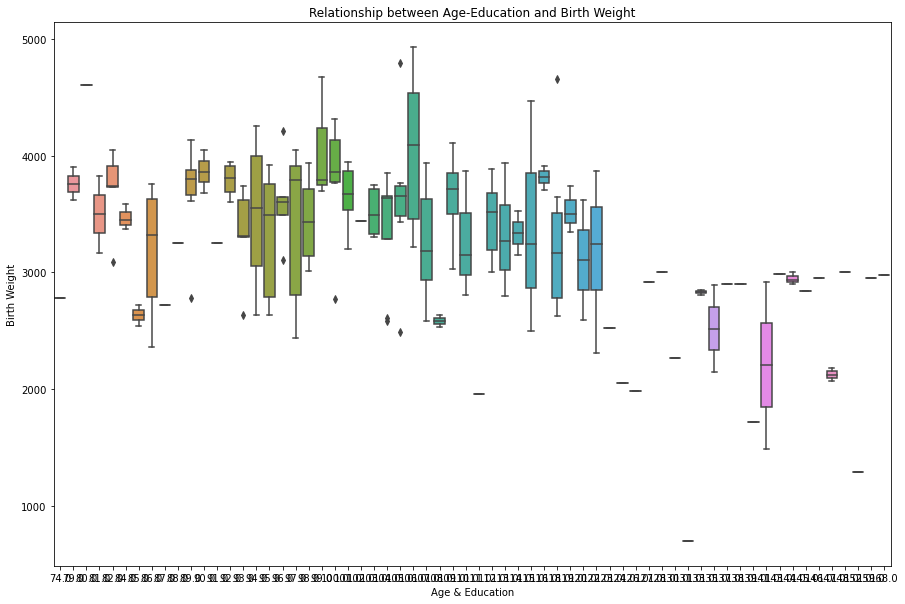


Parents

-----------
Age & Education 
-----------
74.0     1
79.0     2
80.0     1
81.0     2
82.0     5
84.0     3
85.0     2
86.0     5
87.0     1
88.0     1
89.0     7
90.0     2
91.0     1
92.0     4
93.0     5
94.0     4
95.0     8
96.0     5
97.0     7
98.0     6
99.0     3
100.0    7
101.0    6
102.0    1
103.0    6
104.0    8
105.0    6
106.0    5
107.0    8
108.0    2
109.0    4
110.0    3
111.0    1
112.0    8
113.0    4
114.0    2
115.0    3
116.0    3
118.0    7
119.0    3
120.0    2
122.0    4
123.0    1
124.0    1
126.0    1
127.0    1
128.0    1
130.0    1
131.0    1
133.0    2
135.0    2
137.0    1
138.0    1
139.0    1
141.0    2
143.0    1
144.0    3
145.0    1
146.0    1
147.0    2
148.0    1
152.0    1
159.0    1
168.0    1
Name: age_educ, dtype: int64


---------------------
Bathroom Correlations
---------------------
mage    -0.46
fage    -0.40
meduc    0.16
feduc    0.10
bwght    1.00
Name: bwght, dtype: float64




In [21]:
### Combining features 


# Parents with Age & Education
birthweight['age_educ'] = birthweight['mage'] + birthweight['fage'] + birthweight['meduc'] + birthweight['feduc']
# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'age_educ',
            y    = 'bwght',
            data = birthweight)



# titles and labels
plt.title(label   = 'Relationship between Age-Education and Birth Weight')
plt.xlabel(xlabel = 'Age & Education')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
ageduc_corr = birthweight.loc[ : , ['mage', 'fage',
                              'meduc',
                              'feduc',
                              'bwght']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Parents
=========

-----------
Age & Education 
-----------
{birthweight['age_educ'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{ageduc_corr['bwght']}

""")


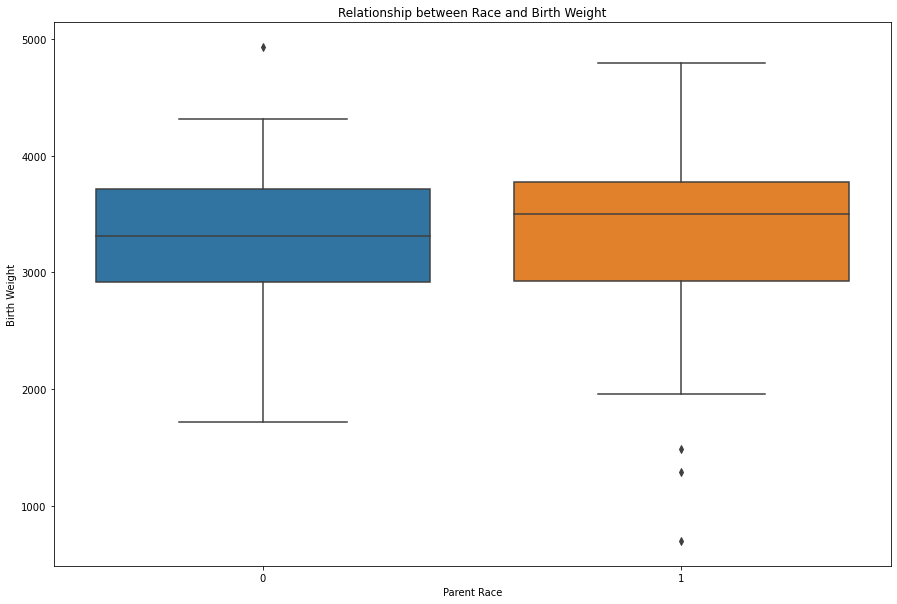


Parents

-----------
Race 
-----------
0     68
1    128
Name: race, dtype: int64


---------------------
Bathroom Correlations
---------------------
mwhte   -0.11
mblck    0.13
moth    -0.02
fwhte   -0.04
fblck    0.12
foth    -0.08
bwght    1.00
Name: bwght, dtype: float64




In [22]:
### Combining features 


# Parents with Race
birthweight['race'] = birthweight['mwhte'] + birthweight['mblck'] 
+ birthweight['moth'] + birthweight['fwhte'] + birthweight['fblck'] + birthweight['foth']
# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'race',
            y    = 'bwght',
            data = birthweight)



# titles and labels
plt.title(label   = 'Relationship between Race and Birth Weight')
plt.xlabel(xlabel = 'Parent Race')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix

race_corr = birthweight.loc[ : , ['mwhte','mblck', 'moth', 'fwhte', 'fblck', 'foth',
                              'bwght']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Parents
=========

-----------
Race 
-----------
{birthweight['race'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{race_corr['bwght']}

""")

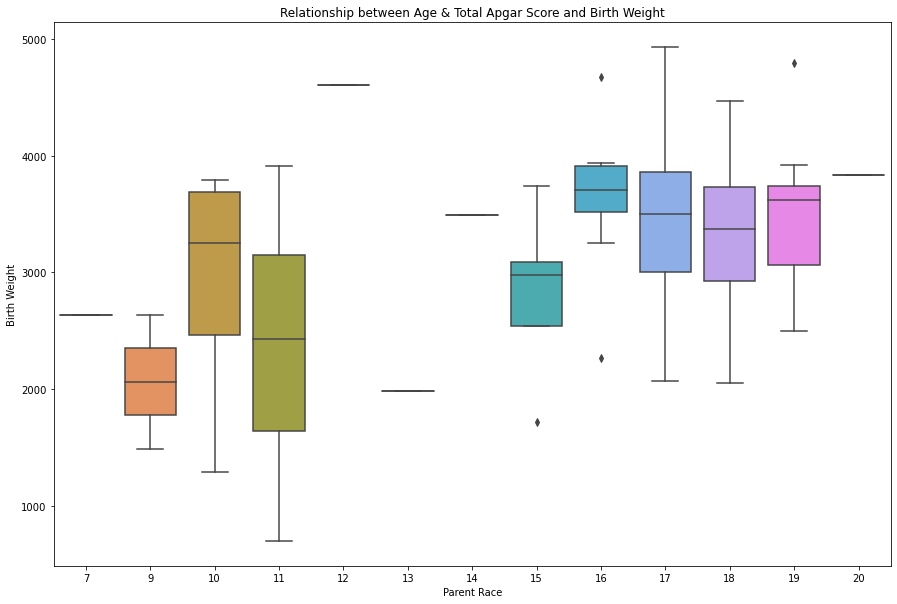


Parents

-----------
Race 
-----------
7      1
9      2
10     4
11     4
12     1
13     1
14     1
15     5
16     8
17    51
18    98
19    19
20     1
Name: age_totalmaps, dtype: int64


---------------------
Bathroom Correlations
---------------------
omaps    0.25
fmaps    0.25
mage    -0.46
fage    -0.40
bwght    1.00
Name: bwght, dtype: float64




In [23]:
### Combining features 


# Parents with Age & Total apgar score
birthweight['age_totalmaps'] = birthweight['omaps'] + birthweight['fmaps'] 
+ birthweight['mage'] + birthweight['fage'] 
# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'age_totalmaps',
            y    = 'bwght',
            data = birthweight)



# titles and labels
plt.title(label   = 'Relationship between Age & Total Apgar Score and Birth Weight')
plt.xlabel(xlabel = 'Parent Race')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix

amaps_corr = birthweight.loc[ : , ['omaps','fmaps', 'mage', 'fage',
                              'bwght']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Parents
=========

-----------
Race 
-----------
{birthweight['age_totalmaps'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{amaps_corr['bwght']}

""")

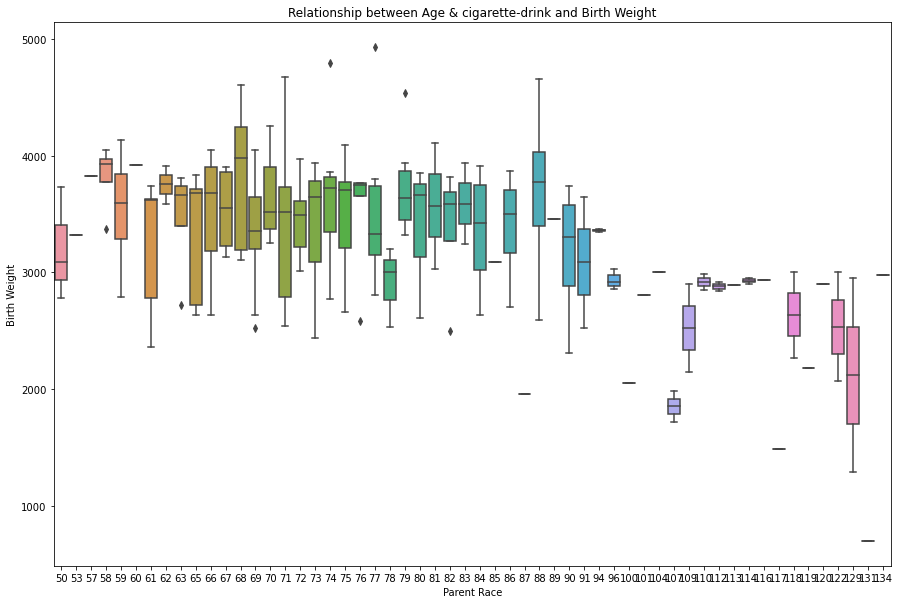


Parents

-----------
Age & cigarette-drink
-----------
50      3
53      1
57      1
58      4
59      4
60      1
61      5
62      3
63      4
65      5
66      5
67      4
68      8
69      9
70      7
71      9
72      5
73     11
74      7
75      6
76      5
77      9
78      3
79      6
80      3
81      2
82      4
83      2
84      4
85      1
86      5
87      1
88      8
89      2
90      6
91      2
94      2
96      3
100     1
101     1
104     1
107     2
109     2
110     2
112     2
113     1
114     2
116     1
117     1
118     2
119     1
120     1
122     2
129     2
131     1
134     1
Name: age_ciggdrink, dtype: int64


---------------------
Bathroom Correlations
---------------------
cigs    -0.57
drink   -0.74
mage    -0.46
fage    -0.40
bwght    1.00
Name: bwght, dtype: float64




In [24]:
### Combining features 


# Parents with Age & cigarette and drink 
birthweight['age_ciggdrink'] = birthweight['fage'] + birthweight['mage'] 
+ birthweight['cigs'] + birthweight['drink'] 
# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'age_ciggdrink',
            y    = 'bwght',
            data = birthweight)



# titles and labels
plt.title(label   = 'Relationship between Age & cigarette-drink and Birth Weight')
plt.xlabel(xlabel = 'Parent Race')
plt.ylabel(ylabel = 'Birth Weight')


# Displaying the plot
plt.tight_layout
plt.show()


# Developing a correlation matrix

aciggdrink_corr = birthweight.loc[ : , ['cigs','drink', 'mage', 'fage',
                              'bwght']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)


# Printing value counts and correlations bathrooms
print(f"""
Parents
=========

-----------
Age & cigarette-drink
-----------
{birthweight['age_ciggdrink'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{aciggdrink_corr['bwght']}

""")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Working with Interval and Count Data</h2><br>

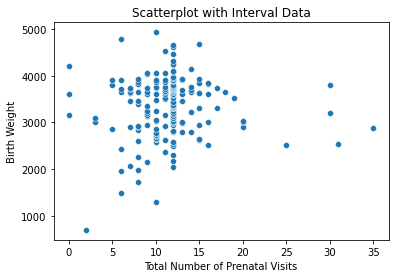

In [25]:
# developing a scatterplot
sns.scatterplot(x    = 'npvis',
                y    = 'bwght',
                data = birthweight)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.show()

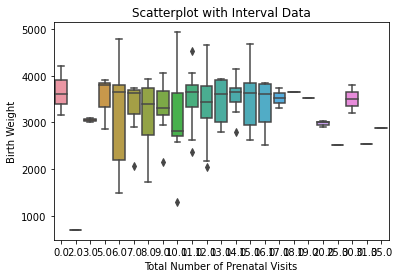

In [26]:
# developing a boxplot
sns.boxplot(x    = 'npvis',
                y    = 'bwght',
                data = birthweight)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.show()

In [27]:
# Log tranform total number of prenatal visits
birthweight['log_npvis'] = np.log(birthweight['npvis'])


log_corr = birthweight.loc[ : , ['npvis',
                             'log_npvis',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['npvis', 'log_npvis'],
              ['bwght', 'log_bwght']   ]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,bwght,log_bwght
npvis,0.04,0.09
log_npvis,0.16,0.24


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Building Predictive Models</h2><br>

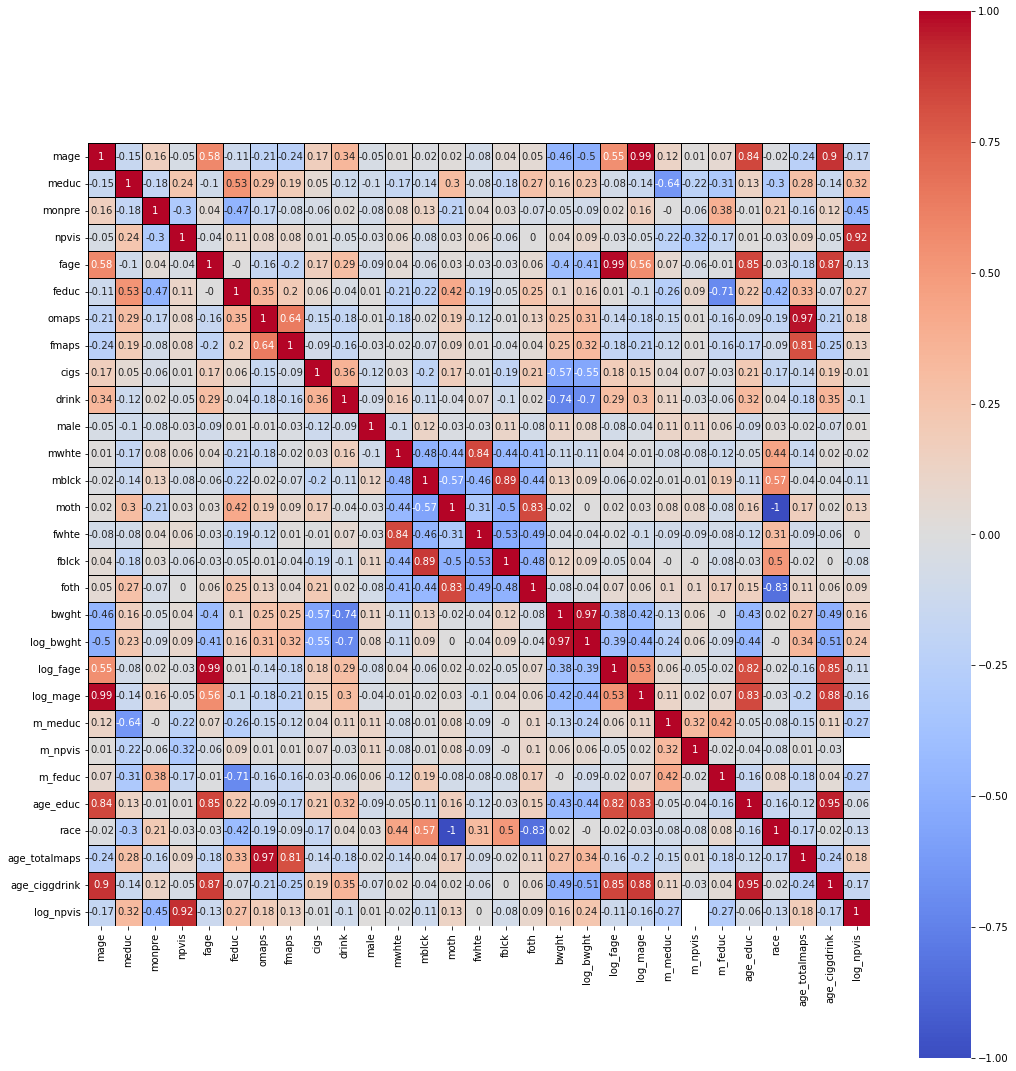

In [28]:
# Instantiating a correlation matrix
df_corr = birthweight.corr().round(2)


# Setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# Visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# Displaying the correlation matrix
plt.tight_layout()
plt.show()

In [29]:
# Creating a (Pearson) correlation matrix
df_corr = birthweight.corr().round(2)


# Printing (Pearson) correlations with SalePrice
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght            1.00
log_bwght        0.97
age_totalmaps    0.27
omaps            0.25
fmaps            0.25
log_npvis        0.16
meduc            0.16
mblck            0.13
fblck            0.12
male             0.11
feduc            0.10
m_npvis          0.06
npvis            0.04
race             0.02
m_feduc         -0.00
moth            -0.02
fwhte           -0.04
monpre          -0.05
foth            -0.08
mwhte           -0.11
m_meduc         -0.13
log_fage        -0.38
fage            -0.40
log_mage        -0.42
age_educ        -0.43
mage            -0.46
age_ciggdrink   -0.49
cigs            -0.57
drink           -0.74
Name: bwght, dtype: float64


In [30]:
# making a copy of Birh Weight
birthweight_explanatory = birthweight.copy()


# Dropping Bwght from the explanatory variable set
birthweight_explanatory = birthweight_explanatory.drop(['bwght',
                                                'log_bwght'], axis = 1)


# Formatting each explanatory variable for statsmodels
for val in birthweight_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_fage +
log_mage +
m_meduc +
m_npvis +
m_feduc +
age_educ +
race +
age_totalmaps +
age_ciggdrink +
log_npvis +


In [31]:
# Saving feature-rich dataset in Excel
birthweight.to_excel('./birthweight_feature_rich_PRACTICE.xlsx',
                 index = False)

In [32]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """bwght ~ mage + meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_fage +
log_mage +
m_meduc +
m_npvis +
m_feduc""", data = birthweight)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     25.39
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.80e-41
Time:                        20:57:54   Log-Likelihood:                -1412.7
No. Observations:                 196   AIC:                             2867.
Df Residuals:                     175   BIC:                             2936.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1939.3798   1507.399     -1.287      0.200   -4914.401    1035.642
mage         -53.2956     17.400     -3.063      0.003     -87.637     -18.954
meduc         22.9710     16.659      1.379      0.170      -9.907      55.849
monpre         1.5686     22.934      0.068      0.946     -43.694      46.832
npvis          1.3709      6.432      0.213      0.831     -11.324      14.065
fage         -23.7206     18.404     -1.289      0.199     -60.043      12.602
feduc         11.9816     14.489      0.827      0.409     -16.614      40.577
omaps        -13.8563     22.282     -0.622      0.535     -57.831      30.119
fmaps         68.2231     51.107      1.335      0.184     -32.642     169.089
cigs         -37.2495      4.569     -8.152      0.000     -46.267     -28.232
drink       -106.4127      9.927    -10.719      0.000    -126.006     -86.820
male           5.4922     51.968      0.106      0.916     -97.072     108.057
mwhte       -566.8052    511.155     -1.109      0.269   -1575.626     442.016
mblck       -755.9815    514.136     -1.470      0.143   -1770.687     258.724
moth        -616.5931    506.442     -1.217      0.225   -1616.114     382.927
fwhte       -696.5479    502.544     -1.386      0.167   -1688.376     295.280
fblck       -514.2511    512.216     -1.004      0.317   -1525.166     496.664
foth        -728.5808    517.714     -1.407      0.161   -1750.348     293.187
log_fage     868.8014    741.977      1.171      0.243    -595.573    2333.176
log_mage    1759.8786    704.565      2.498      0.013     369.340    3150.417
m_meduc      -92.9835    347.202     -0.268      0.789    -778.226     592.259
m_npvis      482.3252    239.725      2.012      0.046       9.202     955.449
m_feduc      355.2964    303.676      1.170      0.244    -244.041     954.634
==============================================================================
Omnibus:                        0.947   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.614
Skew:                           0.065   Prob(JB):                        0.736
Kurtosis:                       3.241   Cond. No.                     5.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Training and Testing Sets</h2><br>

In [33]:
# Preparing explanatory variable data
birthweight_data   = birthweight.drop(["bwght",
                               "log_bwght",
                              "log_npvis"],
                               axis = 1)


# Preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]
log_birthweight_target = birthweight.loc[ : , "log_bwght"]


# Preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 26)
y-side: (147,)


Testing Data
------------
X-side: (49, 26)
y-side: (49,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Ordinary Least Squares Regression</h2><br>

In [34]:
# Declaring set of x-variables
x_variables = ['log_mage', 'log_fage', 'cigs', 
               'drink', 'age_ciggdrink']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_mage +
log_fage +
cigs +
drink +
age_ciggdrink +


In [35]:
# Merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ log_mage +
log_fage +
cigs +
drink +
age_ciggdrink """,
                    data = birthweight_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     75.73
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.31e-38
Time:                        20:57:55   Log-Likelihood:                -1068.8
No. Observations:                 147   AIC:                             2150.
Df Residuals:                     141   BIC:                             2168.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3464.9187   2983.221     -1.161

In [36]:
### Model Development in scikit-learn
# Applying modelin scikit-learn

# Preparing x-variables from the OLS model
ols_data = birthweight.loc[  : , x_variables ]


# preparing response variable
birthweight_target = birthweight.loc[  : , 'bwght' ]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [37]:
### Developing an OLS regression model in scikit-learn

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS,y_test_OLS).round(4)

# Displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7287
OLS Testing Score  : 0.6862
OLS Train-Test Gap : 0.0425


In [38]:
# Zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# Setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# Checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -3464.92)
('log_mage', 1394.35)
('log_fage', 1750.35)
('cigs', -38.24)
('drink', -104.72)
('age_ciggdrink', -46.43)


In [39]:
### Developing a lasso regression model 

# Import linear models
import sklearn.linear_model

In [40]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## The following code has been provided for you ##

# Saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# Displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7421
Lasso Testing Score  : 0.6288
Lasso Train-Test Gap : 0.1133


In [41]:
# Zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# Setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)

    

# Checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3877.77)
('mage', -10.64)
('meduc', 23.44)
('monpre', -0.0)
('npvis', 0.0)
('fage', -0.0)
('feduc', 4.35)
('omaps', 0.0)
('fmaps', 76.17)
('cigs', -37.63)
('drink', -98.9)
('male', 53.27)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -41.73)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('log_fage', -0.0)
('log_mage', -0.0)
('m_meduc', -0.0)
('m_npvis', 410.91)
('m_feduc', 75.0)
('age_educ', -0.0)
('race', 7.79)
('age_totalmaps', 0.0)
('age_ciggdrink', -2.95)


In [42]:
# Developing an ARD model
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))



# Saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4) 


# Displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7375
Testing Score : 0.6454
ARD Train-Test Gap : 0.0921


In [43]:
# Zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# Setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# Checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4049.56)
('mage', -13.85034)
('meduc', 22.26337)
('monpre', -5e-05)
('npvis', 0.00046)
('fage', -0.00161)
('feduc', 0.00064)
('omaps', 0.00051)
('fmaps', 68.00325)
('cigs', -39.49846)
('drink', -101.88311)
('male', 31.87872)
('mwhte', 0.00064)
('mblck', 0.00091)
('moth', -0.01006)
('fwhte', -0.00014)
('fblck', 0.00102)
('foth', -0.00082)
('log_fage', -0.00066)
('log_mage', 0.00149)
('m_meduc', -0.00011)
('m_npvis', 406.24669)
('m_feduc', 0.00083)
('age_educ', -0.00097)
('race', 0.01006)
('age_totalmaps', 0.00086)
('age_ciggdrink', -1.12807)


In [44]:
# Dropping coefficients that are equal to zero

# Printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# Checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4049.56)
('mage', -13.85034)
('meduc', 22.26337)
('monpre', -5e-05)
('npvis', 0.00046)
('fage', -0.00161)
('feduc', 0.00064)
('omaps', 0.00051)
('fmaps', 68.00325)
('cigs', -39.49846)
('drink', -101.88311)
('male', 31.87872)
('mwhte', 0.00064)
('mblck', 0.00091)
('moth', -0.01006)
('fwhte', -0.00014)
('fblck', 0.00102)
('foth', -0.00082)
('log_fage', -0.00066)
('log_mage', 0.00149)
('m_meduc', -0.00011)
('m_npvis', 406.24669)
('m_feduc', 0.00083)
('age_educ', -0.00097)
('race', 0.01006)
('age_totalmaps', 0.00086)
('age_ciggdrink', -1.12807)


In [45]:
# Comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS**      {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}

** OLS is the final model
""")


# Creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# Converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model      Train Score      Test Score
-----      -----------      ----------
OLS**      0.7287           0.6862
Lasso      0.7421           0.6288
ARD        0.7375           0.6454

** OLS is the final model



The final model is the OLS model. Based on the data in the data, I noticed that the cigs, drink, mage, and fage are correlated. After analyzing the training and test data with the OLS model, I got the training score is 0.7287, the testing score is 0.6862, and the train-test gap is 0.0425. I also did research and found that the data has an effect on a baby's birth weight. According to CDC (n.d), preterm birth, low birth weight, and birth abnormalities of the mouth and lip are all increased risks for growing kids when mothers smoke during pregnancy. In addition, Nidirect Government Service (n.d) stated that drinking too much alcohol during pregnancy can result in early birth, low birth weight, and a negative impact on the child's physical and mental development, a disease known as Foetal Alcohol Syndrome (FAS). Marsden (2021) said that lower birth weight babies are correlated to teenage and 35-year-old mothers.




Reference:

CDC (n.d). Learn about substance use during pregnancy and CDC activities to address this important health topic. Retrieved on November 24, 2021. Available at: https://www.cdc.gov/reproductivehealth/maternalinfanthealth/substance-abuse/substance-abuse-during-pregnancy.htm 
Marsden (2021. 10 Factors That Affect A Baby's Birth Weight. Retrieved on November 24, 2021. Available at: https://www.marsden-weighing.co.uk/blog/factors-affect-baby-birth-weight#:~:text=A%20baby%20generally%20inherits%20half,weight%20has%20an%20impact%20too. 
Nidirect Government Service (n.d). Alcohol, smoking and drugs in pregnancy. Retrieved on November 24, 2021. Available at: https://www.nidirect.gov.uk/articles/alcohol-smoking-and-drugs-pregnancy
